#####


<div style="text-align: center;">
  <h1>AI Adoption and Its Impact on the Job Market</h1>
  
</div>


###

### ==>     Data Import and Data Exploration
***

### Datasets
We have 1 csv file 

   - ai_job_market_insights  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math

**Load CVS data**

In [66]:
df = pd.read_csv('ai_job_market_insights.csv')

**Exploring data**

In [8]:
df.shape

(500, 10)

In [69]:
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline


In [74]:
#Searching for duplicate values
df.duplicated().sum()

0

In [6]:
# Searching for null values
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [70]:
# Round the numeric values to two decimal places
df['Salary_USD'] = df['Salary_USD'].round(2)

# Print the updated DataFrame
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.39,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.99,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.93,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.15,Yes,Stable


####

# 1. Job role analysis:

#### Most in-demand roles


In [10]:
job_counts = df['Job_Title'].value_counts()

# Find the top 5 most in-demand roles
top_10_roles = job_counts.head(10)
top_10_roles

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

#### Role-specific trends:

In [11]:
# Group by 'Job_Title' and calculate the mean for specified columns
df_grouped = df.groupby('Job_Title').agg(
    Average_Job_Growth=('Job_Growth_Projection', lambda x: (x == 'Growth').mean()),
    Average_Salary=('Salary_USD', 'mean'),
    Avg_AI_Adoption_Level=('AI_Adoption_Level', lambda x: x.map({'Low': 1, 'Medium': 2, 'High': 3}).mean())
)

# Sort by average job growth
df_grouped = df_grouped.sort_values(by='Average_Job_Growth', ascending=False)

# Display the result
df_grouped

,Average_Job_Growth,Average_Salary,Avg_AI_Adoption_Level
Job_Title,,,
Operations Manager,0.431818,96937.230227,1.795455
AI Researcher,0.392157,95583.347451,1.941176
Software Engineer,0.390244,84490.542439,1.951220
Sales Manager,0.387755,92926.644286,2.000000
Product Manager,0.384615,90802.642564,2.025641
Data Scientist,0.354839,91480.756613,1.983871
UX Designer,0.351852,90157.292407,1.888889
Cybersecurity Analyst,0.254545,89429.064909,1.927273
HR Manager,0.245614,89251.781053,1.929825


####

#### Skill requirements: Determine the most in-demand skills for different job roles.

In [30]:
# Extract and analyze skills
all_skills = [skill for sublist in df["Required_Skills"] for skill in sublist]
skill_counts = pd.Series(all_skills).value_counts()
top_skills = skill_counts.head(10)

# Analyze skills by job role
grouped_df = df.groupby("Job_Title")
skill_counts_by_role = grouped_df["Required_Skills"].apply(lambda skills: pd.Series(skills).value_counts())

skill_counts_by_role

Job_Title                      
AI Researcher  JavaScript          9
               Python              9
               Sales               7
               Cybersecurity       5
               UX/UI Design        4
                                  ..
UX Designer    JavaScript          4
               UX/UI Design        3
               Communication       3
               Sales               3
               Machine Learning    2
Name: Required_Skills, Length: 100, dtype: int64

#####  Based on this output, it seems that JavaScript, Python, Sales, Cybersecurity, and UX/UI Design are the most in-demand skills for the analyzed job titles.

# 2. Industry Analysis 

#### Industry trends: Analuze trends in AI adoption, automation risk, job growth projection levels across different industries

In [77]:
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline


In [65]:
# Display the 'Industry' column along with other relevant columns
display_df = sorted_df[['AI_Adoption_Level', 'Automation_Risk', 'Job_Growth_Projection']]

# Show the resulting DataFrame
display_df

AI_Adoption_Level Automation_Risk Job_Growth_Projection
Industry                                                                  
Education      128            Medium            High               Decline
               236            Medium            High               Decline
               333            Medium            High               Decline
               448            Medium            High               Decline
               63             Medium            High                Growth
...                              ...             ...                   ...
Transportation 12               High          Medium                Growth
               200              High          Medium                Growth
               30               High          Medium                Stable
               195              High          Medium                Stable
               295              High          Medium                Stable

[500 rows x 3 columns]

# 3. Location Analysis:

#### Geographic trends: Analyses job market trends in different locations (e.g. cities,countries)

In [76]:
# Group by location and analyze job market trends
grouped_df = df.groupby('Location').agg(
    Num_Jobs=('Job_Title', 'count'),
    Avg_Salary=('Salary_USD', 'mean'),
    Most_Common_Industry=('Industry', lambda x: x.mode().tolist())
)

# Sort by average salary
sorted_df = grouped_df.sort_values(by='Avg_Salary', ascending=False)
sorted_df

,Num_Jobs,Avg_Salary,Most_Common_Industry
Location,,,
New York,49,93780.427347,"[Education, Manufacturing, Telecommunications]"
Singapore,54,93739.807778,"[Energy, Entertainment]"
Berlin,48,93240.368958,[Telecommunications]
Tokyo,51,92896.554118,[Finance]
Paris,46,92116.473913,[Healthcare]
Sydney,52,91885.409615,[Manufacturing]
San Francisco,62,88953.236452,[Finance]
Toronto,41,88839.929756,[Finance]
London,46,88810.672609,[Manufacturing]


#### Remote work trends: Indentify Regions & Industry with higher demand for remote-friendly jobs

In [82]:
# Group by location and count remote-friendly jobs
grouped_df = df[df['Remote_Friendly'] == 'Yes'].groupby('Location').size().sort_values(ascending=False)

# Display the top locations
grouped_df.head()

Location
San Francisco    31
Dubai            29
Paris            28
Tokyo            27
London           26
dtype: int64

In [83]:
# Group by Industry and count remote-friendly jobs
grouped_df = df[df['Remote_Friendly'] == 'Yes'].groupby('Industry').size().sort_values(ascending=False)

# Display the top locations
grouped_df.head()

Industry
Education             29
Entertainment         28
Energy                27
Finance               27
Telecommunications    26
dtype: int64

In [84]:
import matplotlib.pyplot as plt

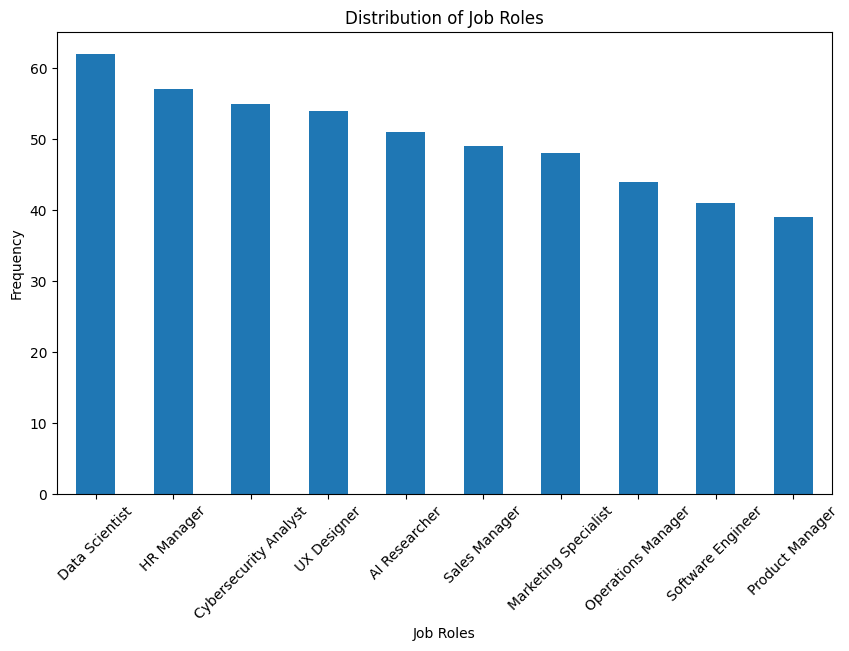

In [90]:
# Count occurrences of each job role
job_counts = df['Job_Title'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Distribution of Job Roles')
plt.xlabel('Job Roles')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

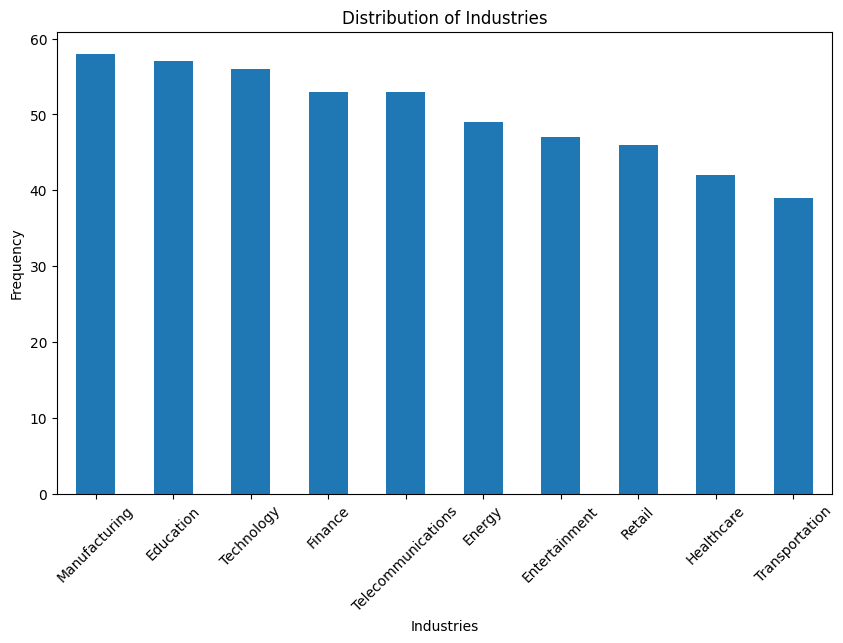

In [17]:
# Count occurrences of each industry
industry_counts = df['Industry'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.title('Distribution of Industries')
plt.xlabel('Industries')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

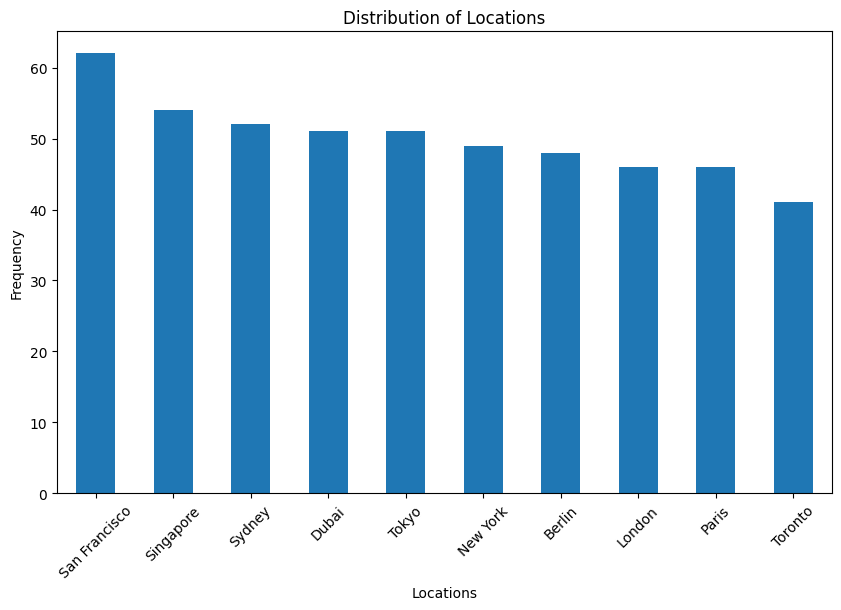

In [18]:
# Count occurrences of each location
location_counts = df['Location'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Distribution of Locations')
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

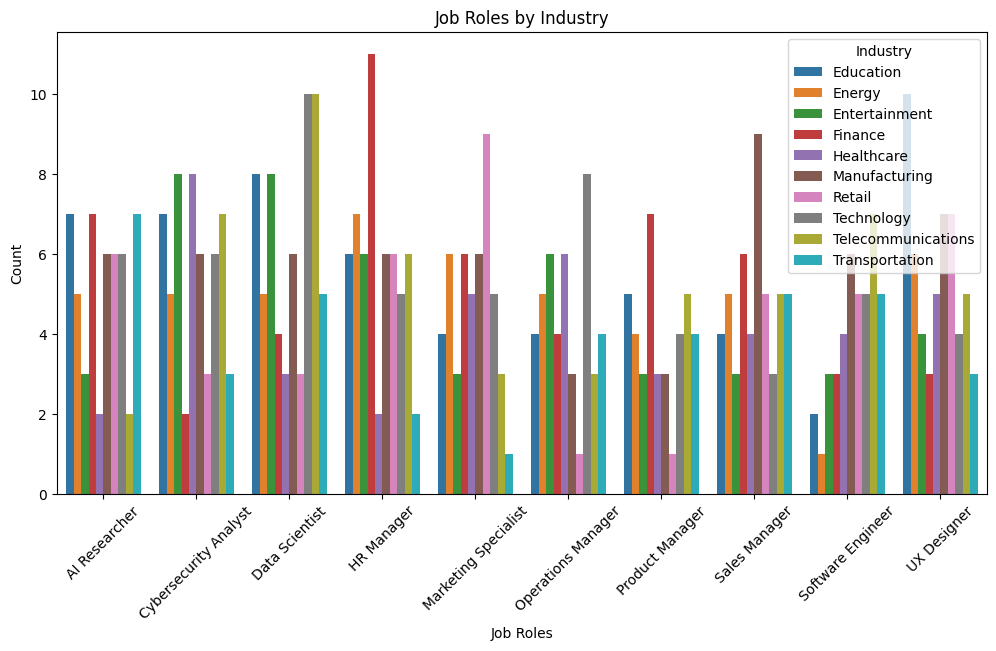

In [21]:
# Group by job role and industry, then count
grouped_data = df.groupby(['Job_Title', 'Industry']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Job_Title', y='Count', hue='Industry', data=grouped_data)
plt.title('Job Roles by Industry')
plt.xlabel('Job Roles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()

# 4. Salary Analysis: 

#### Salary trends: Analyze slary trends for differents job roles, industries, location

In [24]:
grouped_df = df.groupby(['Job_Title', 'Industry', 'Location'])['Salary_USD'].mean().reset_index()

# Sort by average salary
sorted_df = grouped_df.sort_values(by='Salary_USD', ascending=False)
sorted_df

,Job_Title,Industry,Location,Salary_USD
105,Data Scientist,Healthcare,Paris,148467.11
375,UX Designer,Energy,Sydney,140476.00
339,Software Engineer,Finance,Singapore,138448.11
145,HR Manager,Entertainment,San Francisco,135778.95
61,Cybersecurity Analyst,Healthcare,San Francisco,135566.66
...,...,...,...,...
130,Data Scientist,Transportation,New York,41501.29
396,UX Designer,Retail,Tokyo,41495.71
381,UX Designer,Finance,San Francisco,41396.16
272,Product Manager,Healthcare,San Francisco,41298.73


#### Factors affecting salary: Indentify factors that influence salary levels(e.g. experience,education,skiils)

In [37]:
# Group by industry and calculate average salary
industry_salary = df.groupby('Industry')['Salary_USD'].mean().round(2)
industry_salary


Industry
Education             93798.52
Energy                92763.94
Entertainment         94291.23
Finance               94355.47
Healthcare            91688.50
Manufacturing         86590.00
Retail                91232.90
Technology            91204.01
Telecommunications    90418.30
Transportation        85058.30
Name: Salary_USD, dtype: float64

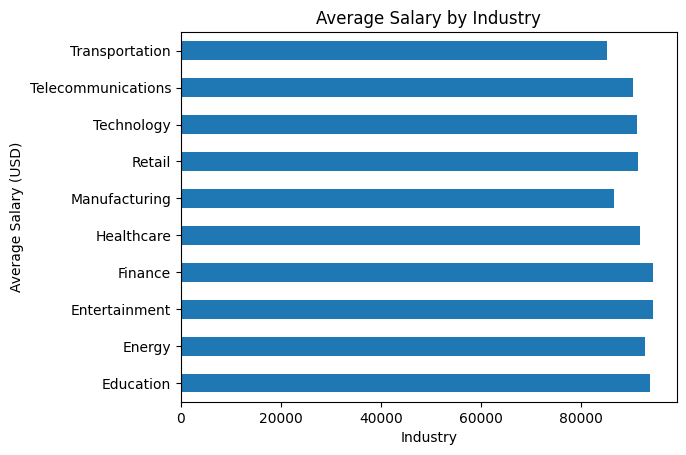

In [38]:
#Create visualizations (bar plots) to understand relationships
# Bar plot for average salary by industry
industry_salary.plot(kind='barh')
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Industry')
plt.show()


In [41]:
# Group by location and calculate mean salary
location_salary = df.groupby('Location')['Salary_USD'].mean().round(2)
location_salary

Location
Berlin           93240.37
Dubai            87892.46
London           88810.67
New York         93780.43
Paris            92116.47
San Francisco    88953.24
Singapore        93739.81
Sydney           91885.41
Tokyo            92896.55
Toronto          88839.93
Name: Salary_USD, dtype: float64

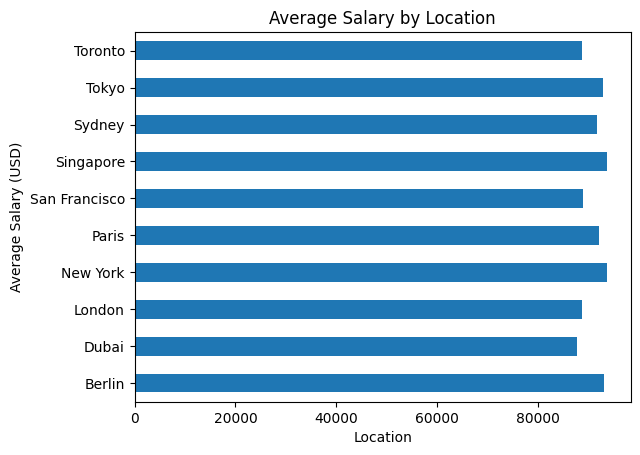

In [42]:
#Create visualizations (bar plots) to understand relationships
# Bar plot for average salary by industry
location_salary.plot(kind='barh')
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Location')
plt.show()


In [49]:
# Group by AI Adoption Level and calculate average salary
avg_salary_by_ai = df.groupby('AI_Adoption_Level')['Salary_USD'].mean().round(2)
avg_salary_by_ai

AI_Adoption_Level
High      87583.42
Low       93353.60
Medium    92139.14
Name: Salary_USD, dtype: float64

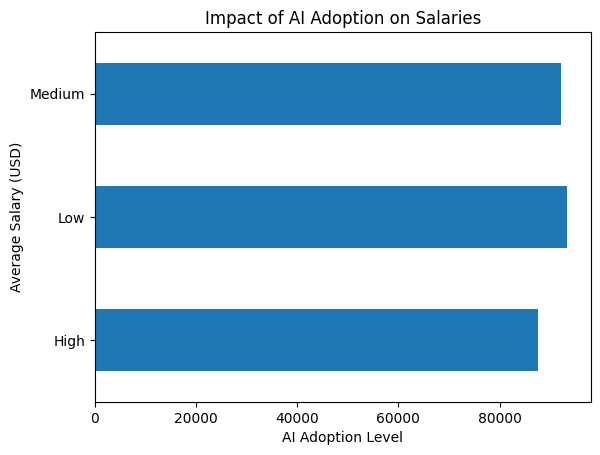

In [55]:
# Create a bar plot
avg_salary_by_ai.plot(kind='barh')
plt.xlabel('AI Adoption Level')
plt.ylabel('Average Salary (USD)')
plt.title('Impact of AI Adoption on Salaries')
plt.show()

In [64]:
avg_salary_by_risk = df.groupby('Automation_Risk')['Salary_USD'].mean().round(2)
avg_salary_by_risk

Automation_Risk
High      93907.53
Low       92112.46
Medium    87786.44
Name: Salary_USD, dtype: float64

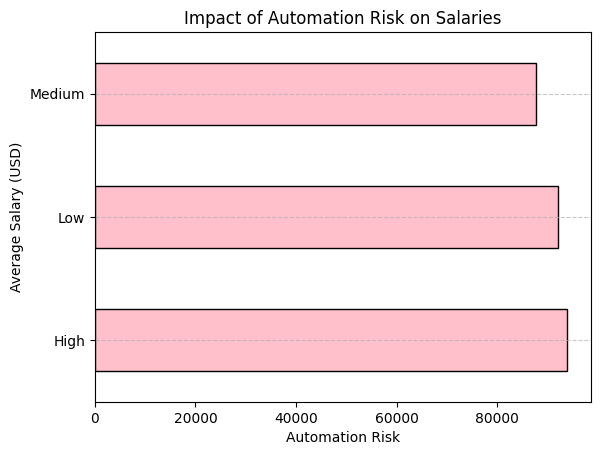

In [65]:
# Create a bar plot
avg_salary_by_risk.plot(kind='barh', color='pink', edgecolor='black')
plt.xlabel('Automation Risk')
plt.ylabel('Average Salary (USD)')
plt.title('Impact of Automation Risk on Salaries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

####